In [59]:
import pickle as pkl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import utils
import models
import GraphKernel

In [60]:
path = 'data/'
with open(path + 'training_data.pkl', 'rb') as file: 
    train_graphs = pkl.load(file) 

with open(path + 'test_data.pkl', 'rb') as file: 
    test_graphs = pkl.load(file) 
    
with open(path + 'training_labels.pkl', 'rb') as file: 
    train_labels = pkl.load(file) 

In [61]:
one_train = []
zero_train = []
for (i,G) in enumerate(train_graphs):
    if(train_labels[i] == 0):
        zero_train.append(G)
    else:
        one_train.append(G)    

In [62]:
train_graphs = one_train
train_labels = [1]*len(one_train)
n = len(train_graphs)
for G in zero_train:
    if(len(train_graphs) == 1000):
        break
    train_graphs.append(G)
    train_labels.append(0)


In [63]:
for G in train_graphs:
    for e in G.edges:
        G.edges[e]['labels'] = G.edges[e]['labels'][0] + 1

for G in test_graphs:
    for e in G.edges:
        G.edges[e]['labels'] = G.edges[e]['labels'][0] + 1

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_graphs, train_labels, test_size=0.33, random_state=42,stratify=train_labels)

In [65]:
randomWalk = GraphKernel.RandomWalkKernel(n_iterations = 5)#GraphKernel.ShortestPath()#
K_train = randomWalk.compute_kernel(X_train,X_train)
K_train

  0%|          | 0/670 [00:00<?, ?it/s]c:\Users\aliha\OneDrive\Desktop\MVA\P2-Kernel Methods\project\utils.py:61: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(P).A #+ np.eye(len(list(P.nodes)))
100%|██████████| 670/670 [16:11<00:00,  1.45s/it]


array([[110., 178.,  84., ..., 238., 120., 154.],
       [178., 402., 232., ..., 428., 206., 218.],
       [ 84., 232., 168., ..., 208., 102.,  92.],
       ...,
       [238., 428., 208., ..., 550., 272., 338.],
       [120., 206., 102., ..., 272., 146., 162.],
       [154., 218.,  92., ..., 338., 162., 244.]])

In [88]:
randomWalk = GraphKernel.RandomWalkKernel(n_iterations = 5)#GraphKernel.ShortestPath()
K_test = randomWalk.compute_kernel(X_test,X_train)
K_test

  0%|          | 0/330 [00:00<?, ?it/s]c:\Users\aliha\OneDrive\Desktop\MVA\P2-Kernel Methods\project\utils.py:61: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(P).A #+ np.eye(len(list(P.nodes)))
100%|██████████| 330/330 [07:18<00:00,  1.33s/it]


array([[184., 276.,  92., ..., 372., 188., 264.],
       [164., 204.,  62., ..., 338., 164., 272.],
       [164., 214.,  80., ..., 344., 164., 280.],
       ...,
       [138., 260., 138., ..., 310., 142., 176.],
       [198., 290., 128., ..., 428., 198., 296.],
       [198., 454., 268., ..., 480., 250., 242.]])

In [92]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(C = 0.05, kernel='precomputed',  probability=True)

# Fit on the train Kernel
clf.fit(K_train, y_train)

# Predict and test.
y_pred = clf.predict(K_test)

print("Classification accuracy: %0.2f" % accuracy_score(y_test, y_pred))

Classification accuracy: 0.65


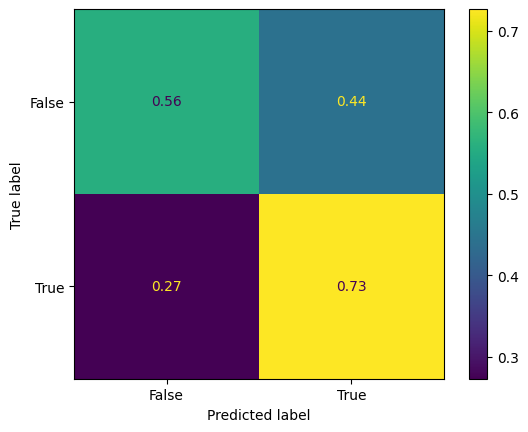

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = clf.predict(K_test)
#tn, fp, fn, tp = confusion_matrix(y_train, y_pred,normalize='true').ravel()
confusion_matrix = confusion_matrix(y_test, y_pred,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\aliha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


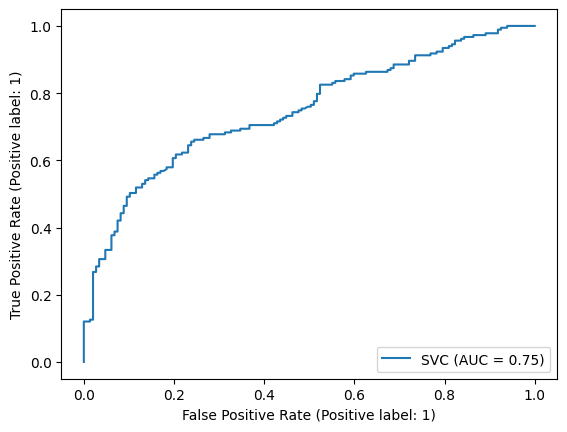

In [94]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(clf, K_test, y_test)

In [ ]:
randomWalk = GraphKernel.RandomWalkKernel(n_iterations = 5)
K_train = randomWalk.compute_kernel(train_graphs,train_graphs)
K_train

100%|██████████| 1000/1000 [00:18<00:00, 54.21it/s]


array([[45972., 15201., 27856., ..., 15788.,  1845., 18149.],
       [15201., 11296., 21360., ...,  8748.,   531.,  8941.],
       [27856., 21360., 61362., ..., 17066.,  1058., 16974.],
       ...,
       [15788.,  8748., 17066., ..., 10210.,   559.,  9441.],
       [ 1845.,   531.,  1058., ...,   559.,   190.,   664.],
       [18149.,  8941., 16974., ...,  9441.,   664., 10670.]])

In [ ]:
K_test = randomWalk.compute_kernel(test_graphs,train_graphs)

100%|██████████| 2000/2000 [00:38<00:00, 51.96it/s]


In [ ]:
y_train = train_labels
y_train = np.array(y_train).reshape(-1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(C = 1, kernel='precomputed',  probability=True)

# Fit on the train Kernel
clf.fit(K_train, y_train)

# Predict and test.
y_pred = clf.predict(K_train)

print("Classification accuracy: %0.2f" % accuracy_score(y_train, y_pred))

Classification accuracy: 0.96


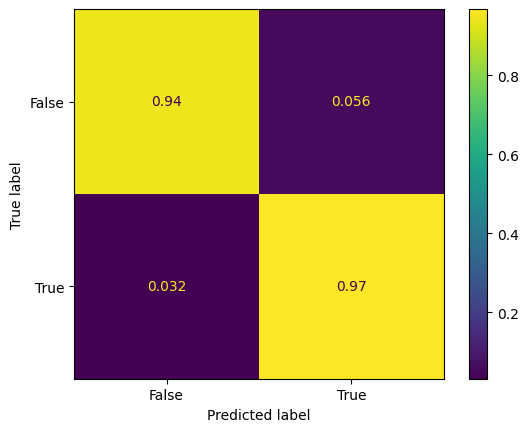

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = clf.predict(K_train)
#tn, fp, fn, tp = confusion_matrix(y_train, y_pred,normalize='true').ravel()
confusion_matrix = confusion_matrix(y_train, y_pred,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\aliha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


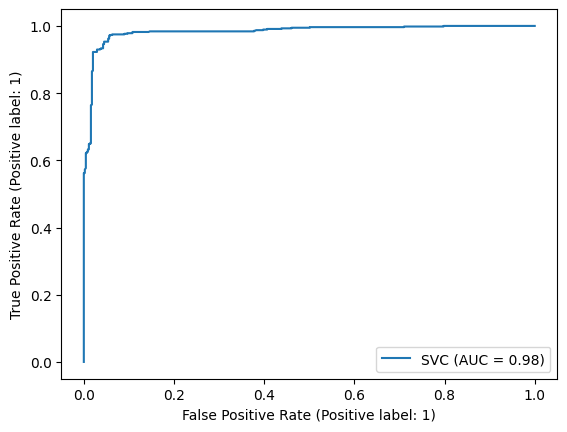

In [ ]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(clf, K_train, y_train)

In [ ]:
y_pred = clf.predict_proba(K_test)[:,1]
y_pred = np.log(y_pred/(1-y_pred))
y_pred

array([-0.96506763,  1.4520078 , -4.37711893, ..., -0.85228997,
        0.78166287, -1.5723605 ])

In [ ]:
sub = pd.DataFrame()
sub['Id']= np.arange(1,len(y_pred)+1)
sub['Predicted'] = y_pred
sub.to_csv("submissions/sub.csv",index=False)